## Contents:

* [Introduction](#intro)

* [Model 3: To predict 2 different crimes : Part1 and Part 2 crimes](#model3)

   * [Feature Set 1: Hour, District, Month](#model3.1)
            
        * [Measure of individual class precision, recall](#model3.1.1)
        
            * [Over sampling/ Class Balancing methods](#model3.1.2)
                
                * [Class balancing method](#model3.1.2.1)
                
                    * [Measure of individual class precision-recall](#model3.1.2.1.1)
        
                * [Oversampling](#model3.1.2.2)
        
                    * [Measure of individual class precision-recall](#model3.1.2.2.1)
        
            * [Inferences](#model3.1.3)
        
   * [Feature Set 2: District, Hour, Month, Streetname](#model3.2)
        
        * [Measure of individual class precision, recall](#model3.2.1)
        
        * [Over sampling/ Class Balancing methods](#model3.2.2)
        
             * [Class balancing method](#model3.2.2.1)
                
                  * [Measure of individual class precision-recall](#model3.2.2.1.1)
        
             * [Oversampling](#model3.2.2.2)
        
                  * [Measure of individual class precision-recall](#model3.2.2.2.1)
            
   * [Inferences](#model3.3)
        
   * [Possible Improvements](#model3.4)

<a id='intro'></a>

## Introduction

In [1]:
%matplotlib inline
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib
import math
import numpy as np
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

In [3]:
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn import cross_validation, metrics
from sklearn import neighbors
from sklearn import linear_model
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [4]:
df_boston = pd.read_pickle('df_boston.pkl')

In [5]:
df_boston.dtypes

year                 int64
month                int64
day_week            object
streetname          object
hours                int64
crime_category      object
latitudes          float64
longitudes         float64
weekday_weekend      int64
district            object
dtype: object

<a id='model3'></a>

### Model 3: To predict 2 different crimes : Part1 and Part 2 crimes

In [30]:
df_boston = pd.read_pickle('df_boston.pkl')

In [31]:
list_crimes = list(df_boston.crime_category.unique())

In [32]:
violent_crimes =['HOMICIDE', 'SEX OFFENCES', 'ROBBERY', 'AGGRAVATED ASSAULT']
property_crimes = ['BURGLARY', 'LARCENY', 'OTHER LARCENY', 'LARCENY FROM MOTOR VEHICLE','PROPERTY','ARSON','FIRE RELATED REPORTS']
part1_crimes = violent_crimes + property_crimes  

In [33]:
part2_crimes = list(set(list_crimes) - set(part1_crimes))

In [34]:
df_model3 = df_boston

In [35]:
def recategorize_part1_part2(df):
    list_crimes = list()
    for crime in df.crime_category:
        if crime in part1_crimes:
            list_crimes.append(0)
        else:
            list_crimes.append(1)
    df.crime_category = list_crimes
    return df

In [36]:
df_model3 = recategorize_part1_part2(df_model3)

In [37]:
df_model3.crime_category.value_counts(normalize=True)

1    0.682022
0    0.317978
Name: crime_category, dtype: float64

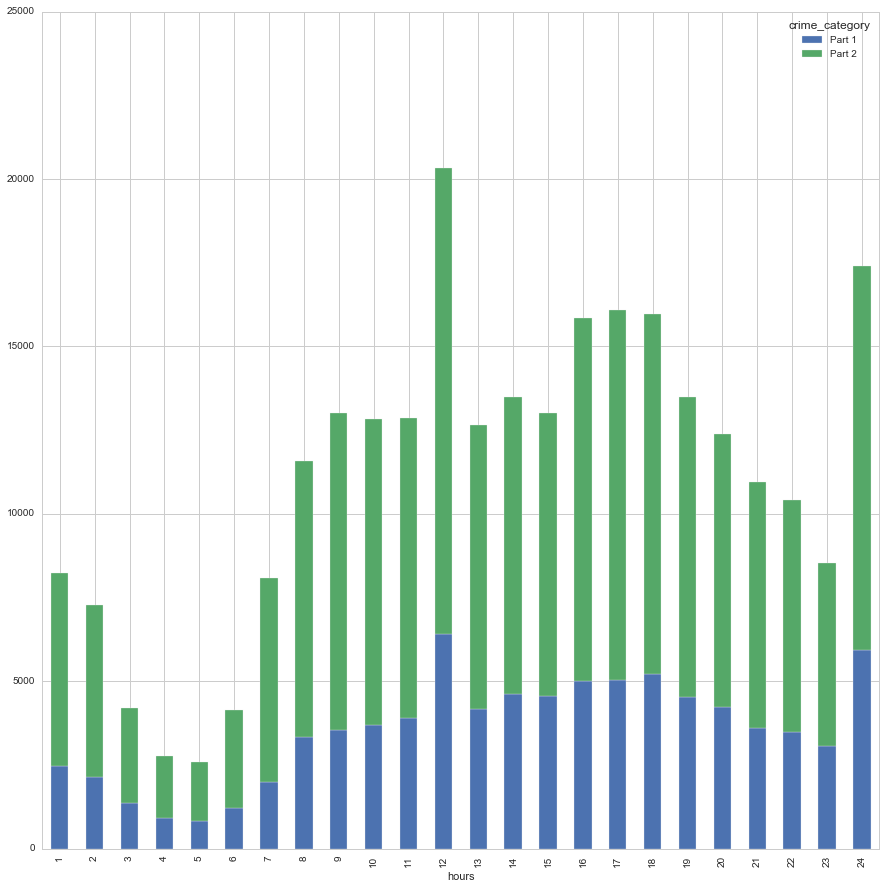

In [115]:
tmp=pd.DataFrame(df_model3.groupby(['hours','crime_category']).size(), columns=['count'])
tmp.reset_index(inplace=True)
tmp=tmp.pivot(index='hours',columns='crime_category',values='count')
fig, axes = plt.subplots(1,1,figsize=(15,15))
tmp.plot(ax=axes,kind='bar', stacked=True)

The hours can be recoded in 4 catefories:
1. Early Morning Hours
2. Peak Hours(12 PM and AM)
3. Rest of the hours
The hours have been split in this way to reflect the way crime distribution changes wrt the hours.

In [14]:
def bin_hours_model3(df):
    list_hours = list()
    for hour in df.hours:
        if hour in range(1,7):
            list_hours.append(0)
        elif hour in [12,24]:
            list_hours.append(1)
        else:
            list_hours.append(2)
    df.hours = list_hours
    return df

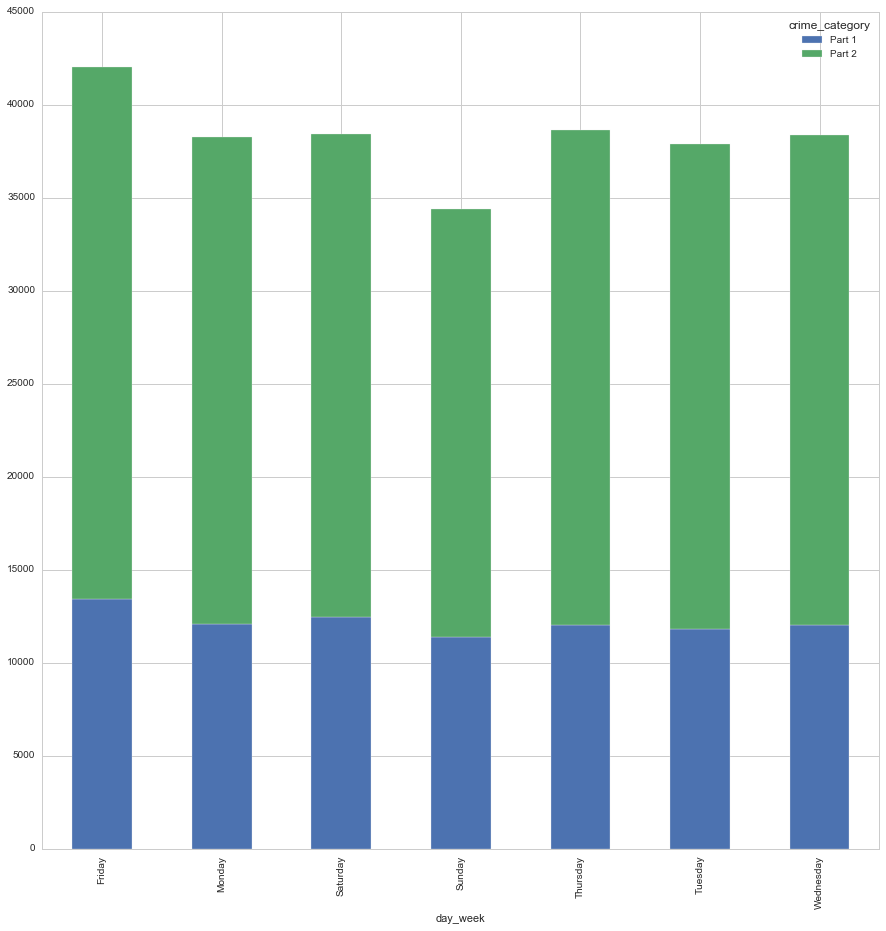

In [117]:
tmp=pd.DataFrame(df_model3.groupby(['day_week','crime_category']).size(), columns=['count'])
tmp.reset_index(inplace=True)
tmp=tmp.pivot(index='day_week',columns='crime_category',values='count')
fig, axes = plt.subplots(1,1,figsize=(15,15))
tmp.plot(ax=axes,kind='bar', stacked=True)

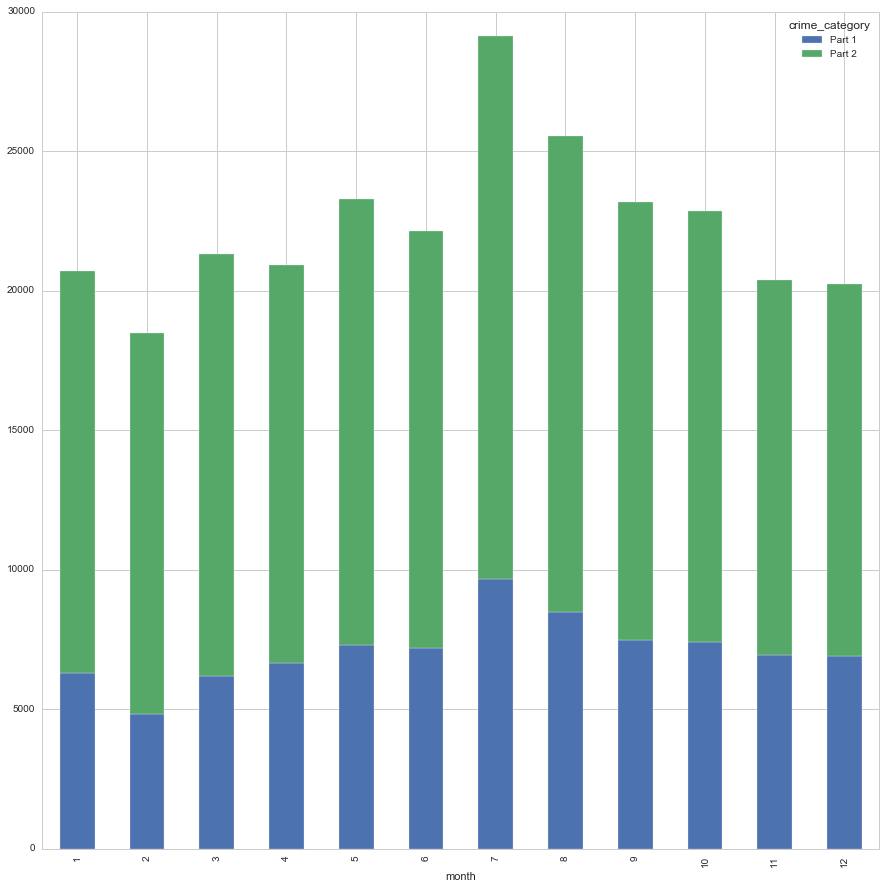

In [118]:
tmp=pd.DataFrame(df_model3.groupby(['month','crime_category']).size(), columns=['count'])
tmp.reset_index(inplace=True)
tmp=tmp.pivot(index='month',columns='crime_category',values='count')
fig, axes = plt.subplots(1,1,figsize=(15,15))
tmp.plot(ax=axes,kind='bar', stacked=True)

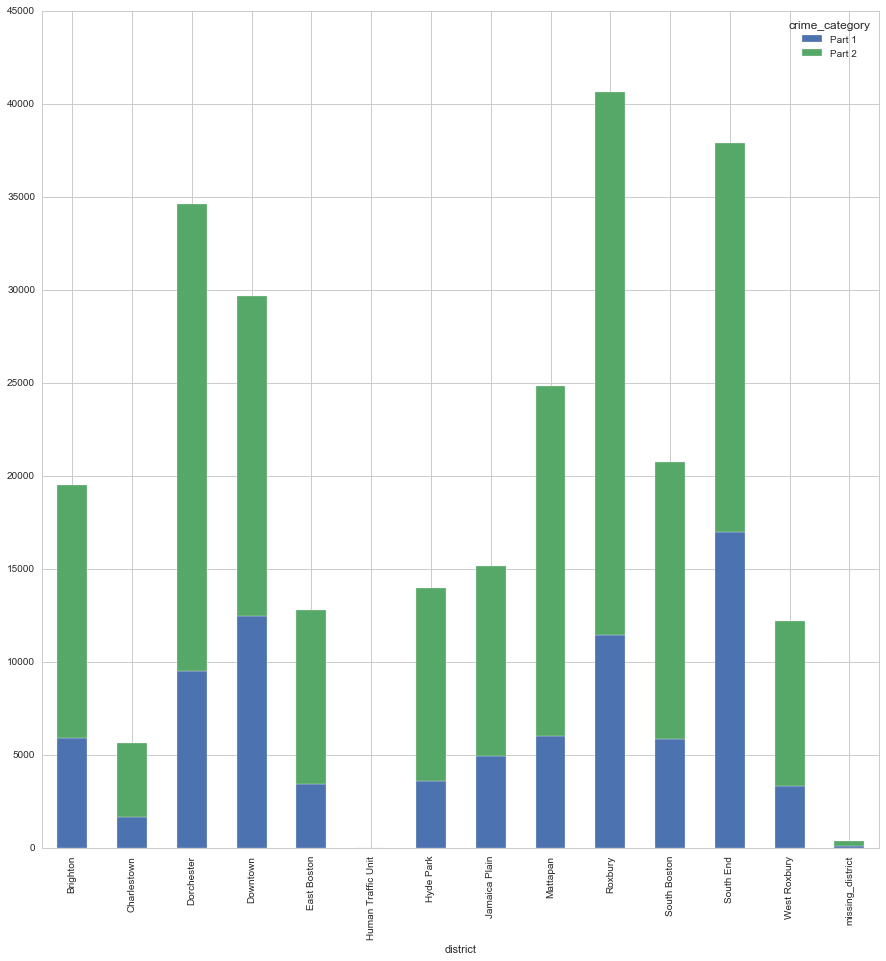

In [119]:
tmp=pd.DataFrame(df_model3.groupby(['district','crime_category']).size(), columns=['count'])
tmp.reset_index(inplace=True)
tmp=tmp.pivot(index='district',columns='crime_category',values='count')
fig, axes = plt.subplots(1,1,figsize=(15,15))
tmp.plot(ax=axes,kind='bar', stacked=True)

In [64]:
df_model3 = df_model3[df_model3['streetname'].isin(top_streets)]

In [55]:
tmp=pd.DataFrame(df_model3.groupby(['streetname','crime_category']).size(), columns=['count'])
tmp.reset_index(inplace=True)
tmp=tmp.pivot(index='streetname',columns='crime_category',values='count')

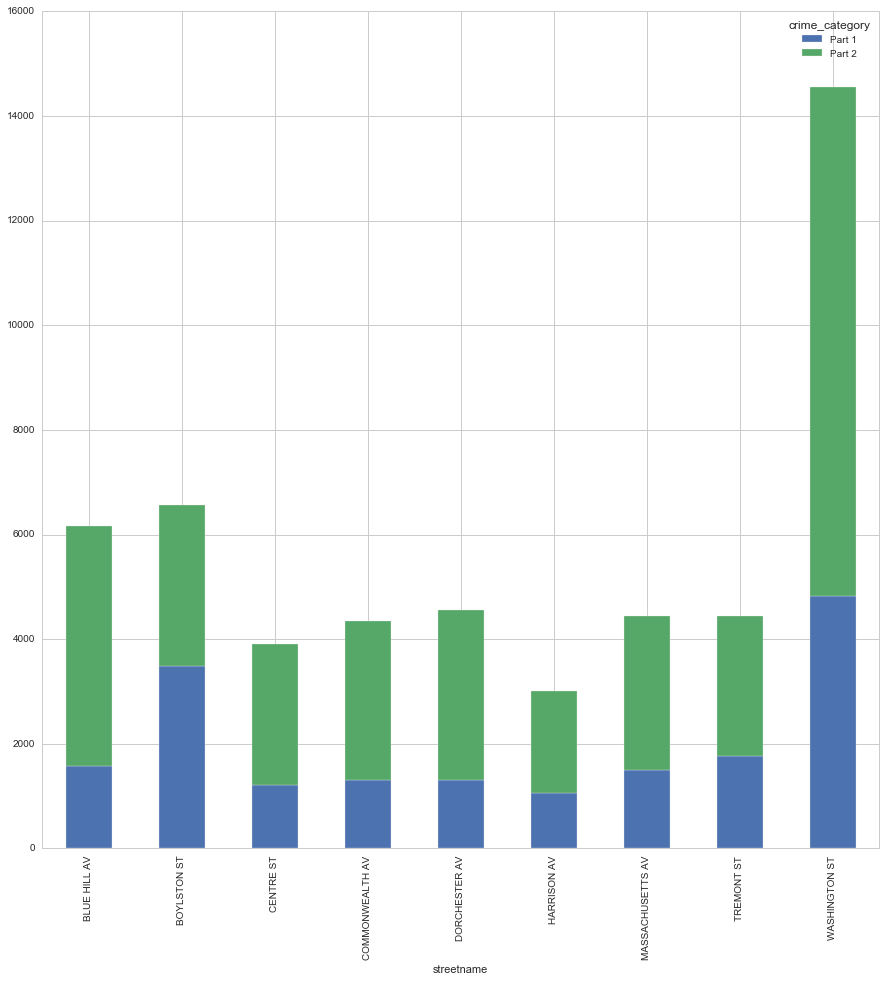

In [131]:
fig, axes = plt.subplots(1,1,figsize=(15,15))
tmp.plot(ax=axes,kind='bar', stacked=True)

In [21]:
df_boston.dtypes

year                 int64
month                int64
day_week            object
streetname          object
hours                int64
crime_category       int64
latitudes          float64
longitudes         float64
weekday_weekend      int64
district            object
dtype: object

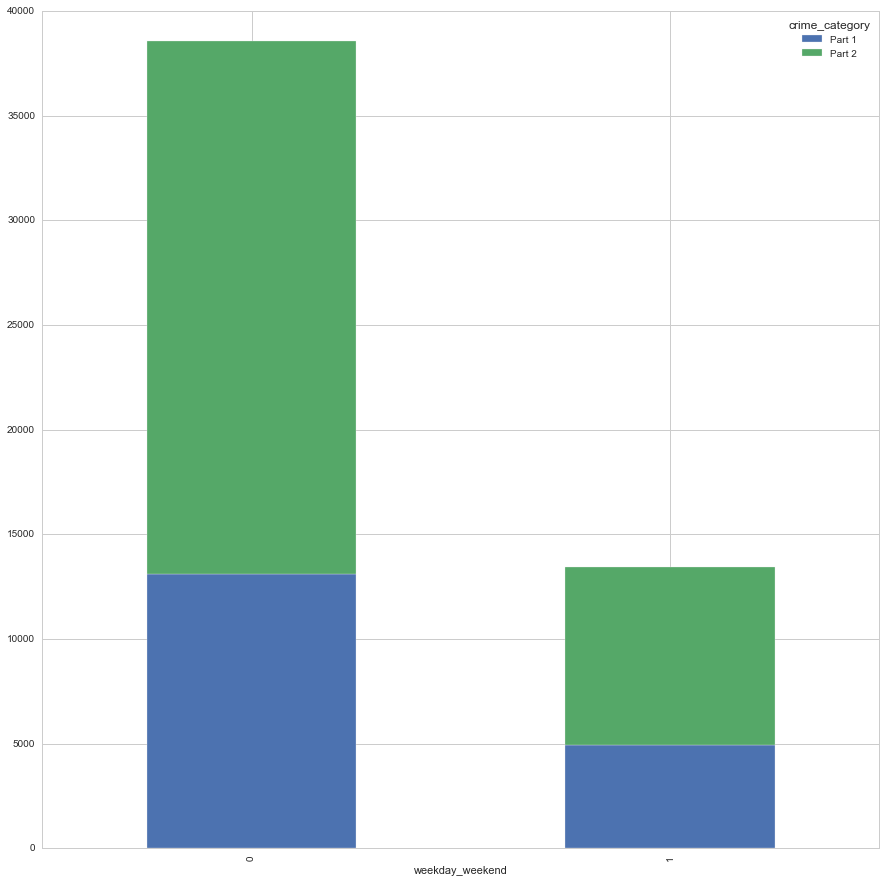

In [137]:
tmp=pd.DataFrame(df_model3.groupby(['weekday_weekend','crime_category']).size(), columns=['count'])
tmp.reset_index(inplace=True)
tmp=tmp.pivot(index='weekday_weekend',columns='crime_category',values='count')
fig, axes = plt.subplots(1,1,figsize=(15,15))
tmp.plot(ax=axes,kind='bar', stacked=True)

In [138]:
df_model3.dtypes

year                 int64
month                int64
day_week            object
streetname          object
hours                int64
crime_category      object
latitudes          float64
longitudes         float64
weekday_weekend      int64
district            object
dtype: object

In [69]:
df_model3['season'] = df_model3.month.apply(lambda x:0 if x in [5,6,7,8,9] else 1)

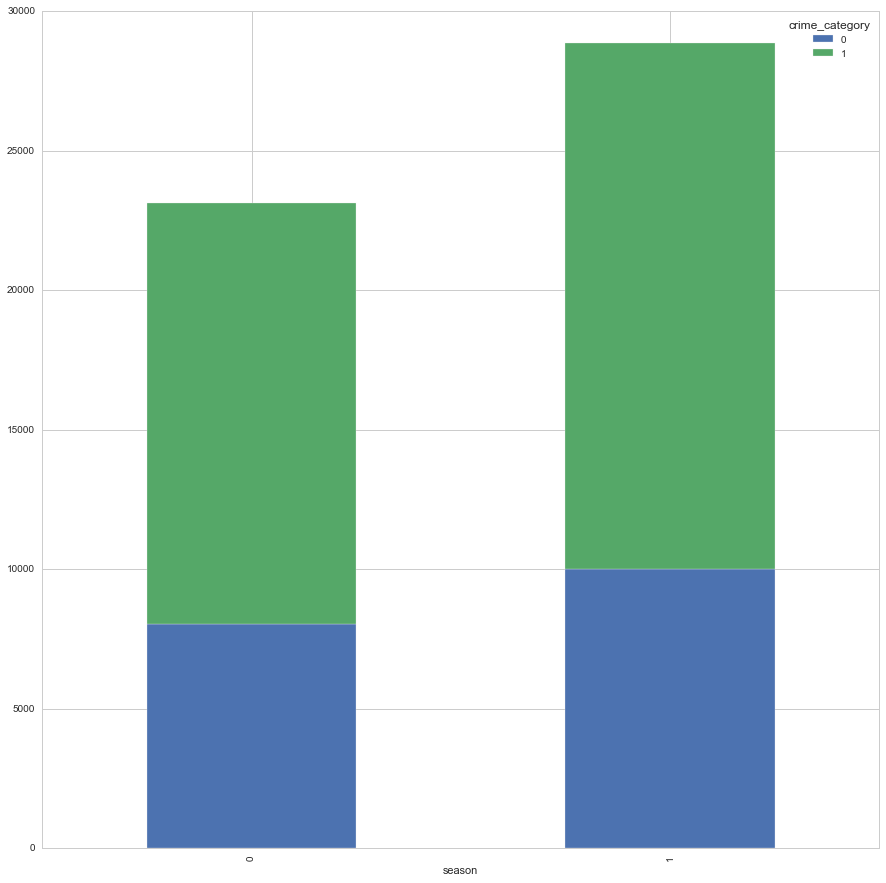

In [57]:
tmp=pd.DataFrame(df_model3.groupby(['season','crime_category']).size(), columns=['count'])
tmp.reset_index(inplace=True)
tmp=tmp.pivot(index='season',columns='crime_category',values='count')
fig, axes = plt.subplots(1,1,figsize=(15,15))
tmp.plot(ax=axes,kind='bar', stacked=True)

In [15]:
df_model3.dtypes

year                 int64
month                int64
day_week            object
streetname          object
hours                int64
crime_category       int64
latitudes          float64
longitudes         float64
weekday_weekend      int64
district            object
dtype: object

* The predictors which seem to have significant predictive power are district, hour, month and the streetname.
* Two combinations of sets with these features were built to check the models' performance.
* The baseline model of (hour, district, month) was first built foloowed by adding the streetname feature to the model.

<a id='model3.1'></a>

#### Feature Set 1: Hour, District, Month

In [16]:
def encode_features_model3_set1(df):
    df_district = pd.get_dummies(df['district'])
    df_month = pd.get_dummies(df['month'])
    df_hours = pd.get_dummies(df['hours'])
    column_dfs = [df_district,df_month,df_hours]
    df_concat = pd.concat(column_dfs,axis=1)
    df_concat.columns = ['Brighton','Charlestown',
     'Dorchester',
     'Downtown',
     'East Boston',
     'Human Traffic Unit',
     'Hyde Park',
     'Jamaica Plain',
     'Mattapan',
     'Roxbury',
     'South Boston',
     'South End',
     'West Roxbury',
     'missing_district'] + ['month' + str(i) for i in range(1,13)] + ['hour' + str(i) for i in range(0,3)]
    return df_concat

In [38]:
df_model3_set1 = bin_hours_model3(df_model3)
#df_model3_set1 = recode_streetname(df_model3_set1)
data_y = df_model3_set1.crime_category
df_model3_set1 = encode_features_model3_set1(df_model3_set1)
data_x = df_model3_set1

In [19]:
data_x = np.array(data_x)
data_y = np.array(data_y)

In [21]:
def logistic_score(data_x,data_y,score,C):
    log_clf = make_pipeline(linear_model.LogisticRegression(C=C))
    log_kf_model2_set1_accuracy = perform_cv(log_clf,data_x,data_y,score)
    return log_kf_model2_set1_accuracy

In [22]:
def rf_score(data_x,data_y,score,number_trees,max_depth):
    rf_clf = make_pipeline(RandomForestClassifier(n_estimators=number_trees,max_depth=max_depth))
    rf_kf_model2_set1_accuracy = perform_cv(rf_clf,data_x,data_y,score)
    return rf_kf_model2_set1_accuracy

In [23]:
def perform_cv(clf, X, Y, scoring_metric):
    kf_scores = list()
    scores = cross_validation.cross_val_score(clf, X, Y, cv=5, scoring=scoring_metric)
    kf_scores.append(scores)
    kf_scores.append(scores.mean())
    return kf_scores

In [27]:
def nb_score(data_x,data_y,score):
    nb_clf = make_pipeline(preprocessing.StandardScaler(), GaussianNB())
    accuracy = perform_cv(nb_clf,data_x,data_y,score)
    return accuracy

#### Naive Bayes

In [50]:
nb_score(data_x,data_y,'accuracy')

[array([ 0.31798851,  0.31797579,  0.31799444,  0.31801309,  0.31806905]),
 0.31800817746913868]

In [51]:
nb_score(data_x,data_y,'roc_auc')

[array([ 0.57777871,  0.48680316,  0.54383842,  0.5355941 ,  0.57722477]),
 0.54424783323429105]

#### Logistic Regression

In [55]:
logistic_score(data_x,data_y,'accuracy',0.01)

[array([ 0.68201149,  0.66249464,  0.68118483,  0.67096305,  0.68202421]),
 0.67573564376157891]

In [57]:
logistic_score(data_x,data_y,'roc_auc',0.01)

[array([ 0.57546472,  0.50727854,  0.54221184,  0.53936537,  0.57668727]),
 0.54820154780349006]

In [30]:
logistic_score(data_x,data_y,'average_precision',0.01)

[array([ 0.7238069 ,  0.66648063,  0.68700692,  0.68713984,  0.71798737]),
 0.69648433100256901]

In [42]:
logistic_score(data_x,data_y,'f1',0.01)

[array([ 0.81094748,  0.79658235,  0.81036281,  0.80308544,  0.81095647]),
 0.80638691083762348]

#### Random Forest

In [28]:
rf_score(data_x,data_y,'accuracy',150,20)

[array([ 0.68143326,  0.66775475,  0.67762213,  0.67088844,  0.68202421]),
 0.67594455826878375]

In [29]:
rf_score(data_x,data_y,'average_precision',150,20)

[array([ 0.72751696,  0.66047052,  0.69889673,  0.68940723,  0.71703646]),
 0.69866558080948682]

In [50]:
rf_score(data_x,data_y,'f1',150,20)

[array([ 0.80887636,  0.79955604,  0.80452368,  0.80135999,  0.81095647]),
 0.8050545082121342]

In [51]:
rf_score(data_x,data_y,'roc_auc',150,20)

[array([ 0.57777248,  0.50084505,  0.54561766,  0.54101797,  0.57373974]),
 0.5477985777190113]

In [2]:
df = pd.DataFrame()
df['algos'] = ['Logistic Regression','Random Forests']
df['roc'] = [0.54,0.54]
df['accuracy'] = [0.68,0.68]
df.set_index('algos')

,roc,accuracy
algos,,
Logistic Regression,0.54,0.68
Random Forests,0.54,0.68


* Due to class imbalance, all the instances get classified as class 1.

<a id='model3.1.1'></a>

#### Measure of individual class precision, recall

In [ ]:
data_x_train, data_x_test, data_y_train, data_y_test = cross_validation.train_test_split(data_x, data_y, test_size=0.3, random_state=0)
clf = RandomForestClassifier(n_estimators=150,max_depth=20)
clf.fit(data_x_train,data_y_train)
expected = data_y_test
predicted = clf.predict(data_x_test)

In [44]:
print("Classification report for classifier %s:\n%s\n"
      % (log_clf, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier Pipeline(steps=[('logisticregression', LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]):
             precision    recall  f1-score   support

          0       0.00      0.00      0.00     25681
          1       0.68      1.00      0.81     54736

avg / total       0.46      0.68      0.55     80417


Confusion matrix:
[[    0 25681]
 [    0 54736]]


/cise/homes/ashwin/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


* As it can be seen, class 0 has zero precision.
* it is better for BPD to have better accuracy for class 0 than class 1 as class 0 are violent crimes.

<a id='model3.1.2'></a>

#### Over sampling/ Class Balancing methods

<a id='model3.1.2.1'></a>

#### Class balancing method

In [47]:
log_clf = make_pipeline(linear_model.LogisticRegression(C=0.01, class_weight='balanced'))
log_kf_model2_set1_accuracy = perform_cv(log_clf,data_x,data_y,'accuracy')
print log_kf_model2_set1_accuracy

[array([ 0.6277326 ,  0.55447576,  0.60552872,  0.56641361,  0.63789148]), 0.59840843210312367]


In [48]:
log_clf = make_pipeline(linear_model.LogisticRegression(C=0.01, class_weight='balanced'))
log_kf_model2_set1_accuracy = perform_cv(log_clf,data_x,data_y,'f1')
print log_kf_model2_set1_accuracy

[array([ 0.73063219,  0.6676962 ,  0.70650605,  0.65860859,  0.73937034]), 0.70056267398795002]


<a id='model3.1.2.1.1'></a>

#### Measure of individual class precision-recall

In [52]:
data_x_train, data_x_test, data_y_train, data_y_test = cross_validation.train_test_split(data_x, data_y, test_size=0.3, random_state=0)
clf = linear_model.LogisticRegression(C=0.01, class_weight='balanced')
clf.fit(data_x_train,data_y_train)
expected = data_y_test
predicted = clf.predict(data_x_test)

In [53]:
print("Classification report for classifier %s:\n%s\n"
      % (log_clf, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier Pipeline(steps=[('logisticregression', LogisticRegression(C=0.01, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))]):
             precision    recall  f1-score   support

          0       0.42      0.41      0.41     25681
          1       0.73      0.73      0.73     54736

avg / total       0.63      0.63      0.63     80417


Confusion matrix:
[[10495 15186]
 [14639 40097]]


* Minority class 0 precision improves.

<a id='model3.1.2.2'></a>

#### Oversampling

In [57]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
data_x_resampled, data_y_resampled = ros.fit_sample(data_x, data_y)

In [58]:
log_clf = make_pipeline(linear_model.LogisticRegression(C=0.01))
log_kf_model2_set1_accuracy = perform_cv(log_clf,data_x_resampled,data_y_resampled,'accuracy')
print log_kf_model2_set1_accuracy

[array([ 0.49596598,  0.41702221,  0.46310579,  0.46738595,  0.50808172]), 0.47031232906684173]


In [59]:
log_clf = make_pipeline(linear_model.LogisticRegression(C=0.01))
log_kf_model2_set1_accuracy = perform_cv(log_clf,data_x_resampled,data_y_resampled,'f1')
print log_kf_model2_set1_accuracy

[array([ 0.49756683,  0.33056969,  0.45736241,  0.40589393,  0.53010254]), 0.44429907914823924]


<a id='model3.1.2.2.1'></a>

#### Measure of individual class precision-recall

In [60]:
data_x_train, data_x_test, data_y_train, data_y_test = cross_validation.train_test_split(data_x_resampled, data_y_resampled, test_size=0.3, random_state=0)
clf = linear_model.LogisticRegression(C=0.01)
clf.fit(data_x_train,data_y_train)
expected = data_y_test
predicted = clf.predict(data_x_test)

In [61]:
print("Classification report for classifier %s:\n%s\n"
      % (log_clf, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier Pipeline(steps=[('logisticregression', LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]):
             precision    recall  f1-score   support

          0       0.60      0.42      0.49     54565
          1       0.56      0.73      0.63     55127

avg / total       0.58      0.57      0.56    109692


Confusion matrix:
[[22691 31874]
 [15041 40086]]


<a id='model3.1.3'></a>

#### Inferences

* Logistic Regression and  Random Forests seem suited for this level of classification.
* SVM are not tried as they don't generalize well on data more than 100,000 samples and are computationally intensive.
* The individual class precision/recall is reduced due to the skewed dataset.
* Balancing the classes decreases the overall cross validated accuracy though the individual class precision/recall increases.

<a id='model3.2'></a>

#### Feature Set 2: District, Hour, Month, Streetname

In [62]:
def encode_features_model3_set2(df):
    df_district = pd.get_dummies(df['district'])
    df_month = pd.get_dummies(df['month'])
    df_hours = pd.get_dummies(df['hours'])
    df_streetname = pd.get_dummies(df['streetname'])
    column_dfs = [df_district,df_month,df_hours,df_streetname]
    df_concat = pd.concat(column_dfs,axis=1)
    df_concat.columns = ['Brighton','Charlestown',
     'Dorchester',
     'Downtown',
     'East Boston',
     'Human Traffic Unit',
     'Hyde Park',
     'Jamaica Plain',
     'Mattapan',
     'Roxbury',
     'South Boston',
     'South End',
     'West Roxbury',
     'missing_district'] + ['month' + str(i) for i in range(1,13)]  + ['hour' + str(i) for i in range(0,3)] + ['street' + str(i) for i in range(0,10)]
    
    return df_concat

In [63]:
def recode_streetname(df):
    list_street = list()
    for street in df.streetname:
        if street not in top_streets:
            list_street.append('other')
        else:
            list_street.append(street)
    df.streetname = list_street
    return df

In [71]:
df_boston = pd.read_pickle('df_boston.pkl')
top_streets = list(df_boston.streetname.value_counts()[:9].index)
df_model3 = df_boston

In [72]:
df_model3 = recategorize_part1_part2(df_model3)

In [73]:
df_model3_set2 = bin_hours_model3(df_model3)
df_model3_set2 = recode_streetname(df_model3_set2)
data_y = df_model3_set2.crime_category
df_model3_set2 = encode_features_model3_set2(df_model3_set2)
data_x = df_model3_set2

#### Naive Bayes Classifier

In [75]:
nb_score(data_x,data_y,'accuracy')

[array([ 0.31798851,  0.31756543,  0.31984108,  0.31833019,  0.32178098]),
 0.31910123672936513]

In [76]:
nb_score(data_x,data_y,'roc_auc')

[array([ 0.57562986,  0.50173767,  0.55288   ,  0.54105248,  0.57490138]),
 0.54924027752003346]

#### Logistic Regression

In [77]:
logistic_score(data_x,data_y,'accuracy',0.01)

[array([ 0.68408192,  0.66945216,  0.68200556,  0.67088844,  0.68375893]),
 0.67803740246620292]

In [78]:
logistic_score(data_x,data_y,'roc_auc',0.01)

[array([ 0.57598087,  0.50909792,  0.54498789,  0.54151568,  0.57718339]),
 0.5497531483613175]

In [79]:
logistic_score(data_x,data_y,'average_precision',0.01)

[array([ 0.72254347,  0.6663378 ,  0.68773413,  0.68837706,  0.71761809]),
 0.69652211005637987]

In [78]:
logistic_score(data_x,data_y,'f1',0.01)

[array([ 0.81021481,  0.79931525,  0.80905873,  0.8005564 ,  0.81000885]),
 0.80583080908327598]

#### Random Forests

In [81]:
rf_score(data_x,data_y,'accuracy',150,20)

[array([ 0.68658136,  0.67331331,  0.68513924,  0.67974856,  0.68793718]),
 0.6825439309792305]

In [80]:
rf_score(data_x,data_y,'average_precision',150,20)

[array([ 0.72644715,  0.66948183,  0.70030968,  0.69773467,  0.72002695]),
 0.7028000583895444]

In [79]:
rf_score(data_x,data_y,'f1',150,20)

[array([ 0.80945314,  0.80127461,  0.80791706,  0.8043503 ,  0.81152734]),
 0.80690448844259577]

In [81]:
rf_score(data_x,data_y,'roc_auc',150,20)

[array([ 0.58194711,  0.51063263,  0.55094088,  0.54812849,  0.57913345]),
 0.55415651225192508]

In [3]:
df = pd.DataFrame()
df['algos'] = ['Logistic Regression','Random Forests']
df['roc'] = [0.54,0.55]
df['accuracy'] = [0.68,0.68]
df.set_index('algos')

,roc,accuracy
algos,,
Logistic Regression,0.54,0.68
Random Forests,0.55,0.68


* Low scores in accuracy and auc-roc due to class imabalance.

<a id='model3.2.1'></a>

#### Measure of individual class precision, recall

In [74]:
data_x_train, data_x_test, data_y_train, data_y_test = cross_validation.train_test_split(data_x, data_y, test_size=0.3, random_state=0)
clf = RandomForestClassifier(n_estimators=150,max_depth=20)
clf.fit(data_x_train,data_y_train)
expected = data_y_test
predicted = clf.predict(data_x_test)

In [75]:
print("Classification report for classifier %s:\n%s\n"
      % (log_clf, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier Pipeline(steps=[('logisticregression', LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]):
             precision    recall  f1-score   support

          0       0.57      0.06      0.11     25681
          1       0.69      0.98      0.81     54736

avg / total       0.65      0.69      0.59     80417


Confusion matrix:
[[ 1584 24097]
 [ 1207 53529]]


<a id='model3.2.2'></a>

#### Over sampling/ Class Balancing methods

<a id='model3.2.2.1'></a>

#### Class balancing method

In [76]:
log_clf = make_pipeline(linear_model.LogisticRegression(C=0.01, class_weight='balanced'))
log_kf_model2_set1_accuracy = perform_cv(log_clf,data_x,data_y,'accuracy')
print log_kf_model2_set1_accuracy

[array([ 0.62452436,  0.55333793,  0.60355151,  0.561825  ,  0.6347951 ]), 0.59560678023405567]


In [77]:
log_clf = make_pipeline(linear_model.LogisticRegression(C=0.01, class_weight='balanced'))
log_kf_model2_set1_accuracy = perform_cv(log_clf,data_x,data_y,'f1')
print log_kf_model2_set1_accuracy

[array([ 0.72636072,  0.66559602,  0.70428806,  0.65204189,  0.73535812]), 0.69672896292998443]


<a id='model3.2.2.1.1'></a>

#### Measure of individual class precision-recall

In [82]:
data_x_train, data_x_test, data_y_train, data_y_test = cross_validation.train_test_split(data_x, data_y, test_size=0.3, random_state=0)
clf = linear_model.LogisticRegression(C=0.01, class_weight='balanced')
clf.fit(data_x_train,data_y_train)
expected = data_y_test
predicted = clf.predict(data_x_test)

In [83]:
print("Classification report for classifier %s:\n%s\n"
      % (log_clf, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier Pipeline(steps=[('logisticregression', LogisticRegression(C=0.01, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))]):
             precision    recall  f1-score   support

          0       0.41      0.42      0.42     25681
          1       0.73      0.72      0.73     54736

avg / total       0.63      0.63      0.63     80417


Confusion matrix:
[[10669 15012]
 [15054 39682]]


<a id='model3.2.2.2'></a>

#### Oversampling

In [84]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
data_x_resampled, data_y_resampled = ros.fit_sample(data_x, data_y)

In [85]:
log_clf = make_pipeline(linear_model.LogisticRegression(C=0.01))
log_kf_model2_set1_accuracy = perform_cv(log_clf,data_x_resampled,data_y_resampled,'accuracy')
print log_kf_model2_set1_accuracy

[array([ 0.49552839,  0.42257412,  0.46161525,  0.46686632,  0.50287168]), 0.46989114976479601]


In [86]:
log_clf = make_pipeline(linear_model.LogisticRegression(C=0.01))
log_kf_model2_set1_accuracy = perform_cv(log_clf,data_x_resampled,data_y_resampled,'f1')
print log_kf_model2_set1_accuracy

[array([ 0.49866141,  0.35503284,  0.45397684,  0.40665378,  0.52134299]), 0.44713357215221039]


<a id='model3.2.2.2.1'></a>

#### Measure of individual class precision-recall

In [87]:
data_x_train, data_x_test, data_y_train, data_y_test = cross_validation.train_test_split(data_x_resampled, data_y_resampled, test_size=0.3, random_state=0)
clf = linear_model.LogisticRegression(C=0.01)
clf.fit(data_x_train,data_y_train)
expected = data_y_test
predicted = clf.predict(data_x_test)

In [88]:
print("Classification report for classifier %s:\n%s\n"
      % (log_clf, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier Pipeline(steps=[('logisticregression', LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]):
             precision    recall  f1-score   support

          0       0.60      0.42      0.49     54565
          1       0.56      0.73      0.63     55127

avg / total       0.58      0.57      0.56    109692


Confusion matrix:
[[22762 31803]
 [15132 39995]]


<a id='model3.3'></a>

### Inferences

* The second feature set of (Hour, DIstrict, Month, Streetname) gives better results whencompared to the first model.
* Class balancing leads to better precision-recall scores compared to the original dataset due to class imbalance.

<a id='model3.4'></a>

#### Possible Improvements:
* Other classifiers like SVMs and boosting methods can be tried to check their performance.
* More resampling methods can be tried to imrpove the class balance.
* The algorithms can be optimized using Grid Search to find the hyper parameters.
* Other class collapsing methods can be tried and evaulated.